In [2]:
import os, sys, pandas as pd, wfdb, pickle, scipy, time
from datetime import datetime, timedelta
from scipy.signal import spectrogram
from scipy import interpolate
import torch.nn as nn
import numpy as np, librosa
from torch.utils.data import Dataset, DataLoader, ConcatDataset, sampler, WeightedRandomSampler
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import tqdm.notebook as n_tqdm

In [3]:
base_dir = '/N/project/waveform_mortality/rmahawar/waveform'

In [4]:
sys.path = [base_dir] + sys.path

In [5]:
from utils.data_utils import *

In [6]:
### Config
classes = 2
X = 30 #seconds
Y = 24 #hours
modality = ['II'] # 2-lead ECG

In [7]:
class Data(Dataset):
    def __init__(self, table, x, y, z = 'VStart', modality = ['II']):
        super(Data, self).__init__()
        self.x = x
        self.z = z
        self.y = y
        self.modality = modality

        self.table = pd.read_csv(table)
        self.table = create_snapshot(self.table, 0, self.y, 'DEATH_MV')
    
    def get_table(self):
        return self.table
    
    def __len__(self):
        return len(self.table)
    
    def __getitem__(self, idx):
        chart = self.table
        patient_id = chart.loc[idx]['SUBJECT_ID']

        end = datetime.strptime(chart.loc[idx]['VStart'], '%Y-%m-%d %H:%M:%S.%f %Z')
        start = end - timedelta(seconds= self.x)

        data = get_waveform_data(int(patient_id), (start, end), channels= self.modality)
        label = chart.loc[idx]['label']
        return data, label

In [8]:
data = Data(os.path.join(base_dir, 'db', 'MV_Mortality.csv'), x= X, y = Y, modality= modality)

In [9]:
table = data.get_table()
len(table[table['label'] == 1]), len(table[table['label'] == 0]), len(table) ## deaths, survivors, total

(236, 4759, 4995)

#### 236 patients died and 4759 patiens survived, out of 4995 patients when y = 24 hrs

In [ ]:
# pick 10 random death samples
deaths_idx = table[table['label'] == 1].index

In [ ]:
deaths_chosen = []
for idx in deaths_idx:
    if data[idx][0] is not None:
        deaths_chosen.append(idx)

In [14]:
deaths_idx = np.random.choice(deaths_chosen, 10)

## Visualization of ECG data (30 secs before mechanical ventillation) of patients who DIED

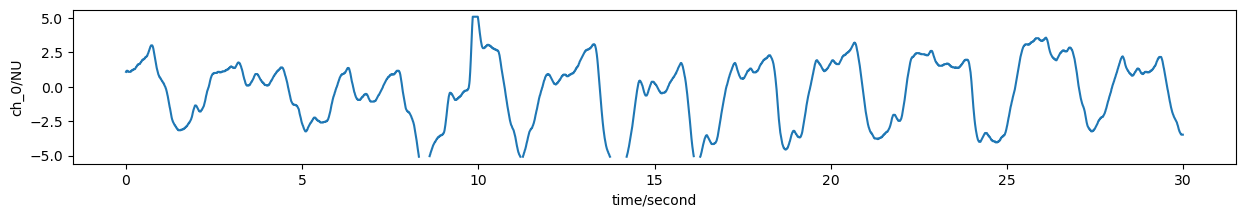

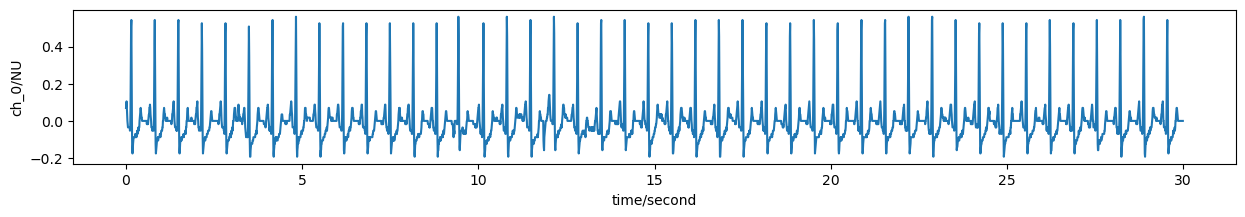

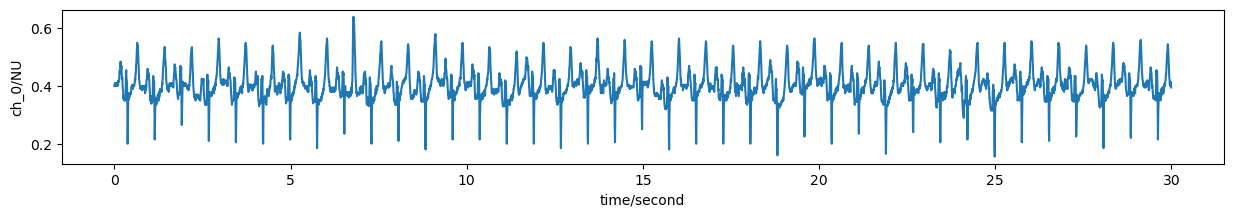

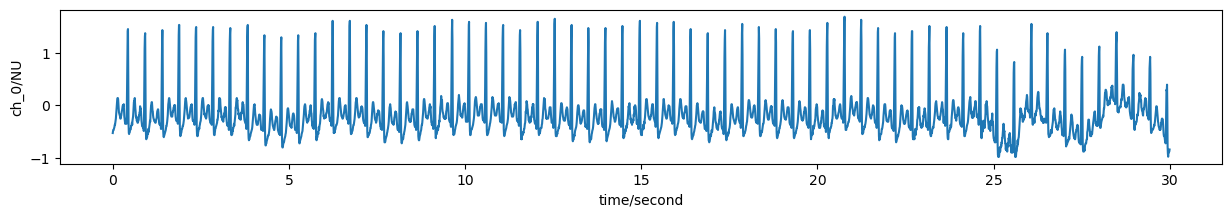

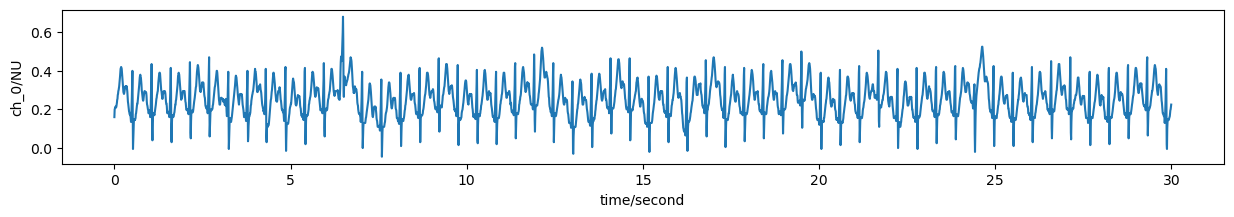

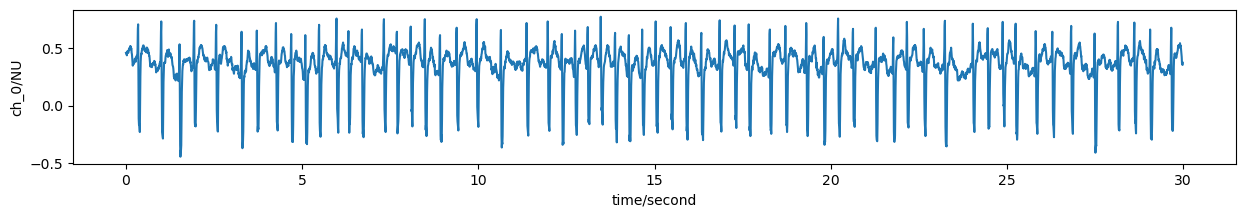

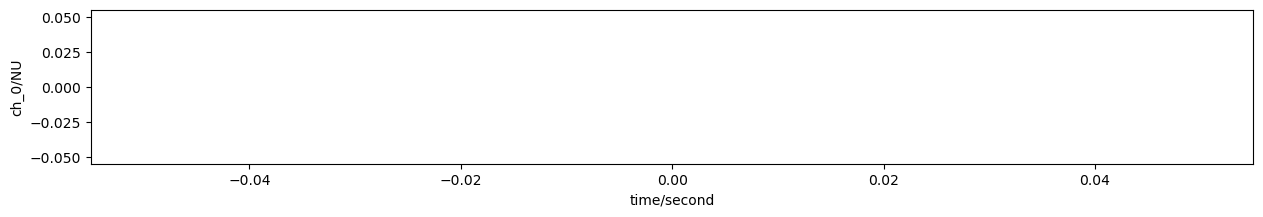

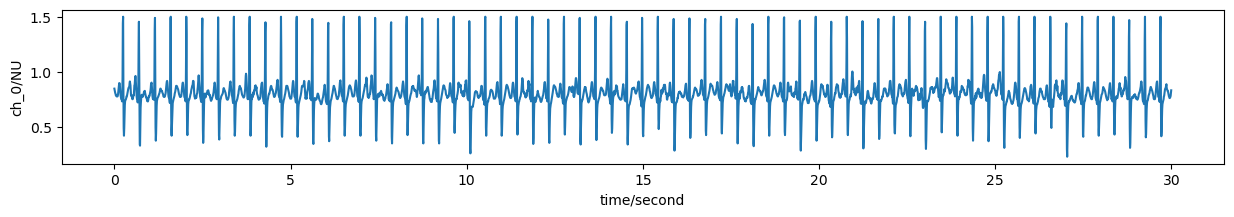

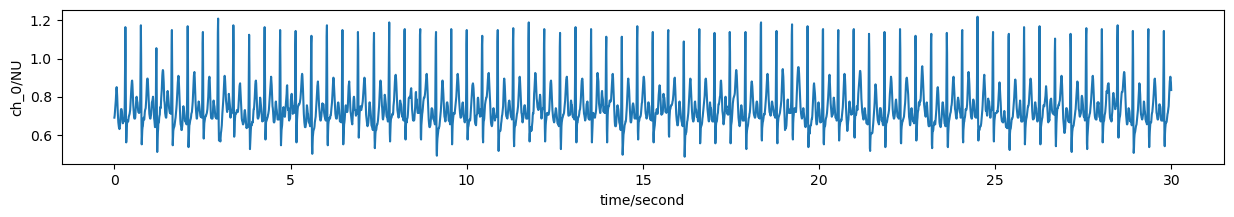

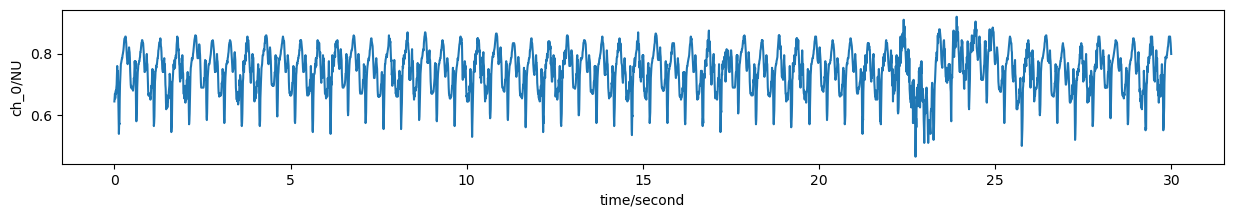

In [15]:
for i in deaths_idx:
    wfdb.plot_items(data[i][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))

### some more visualization of ECG data of patients who died

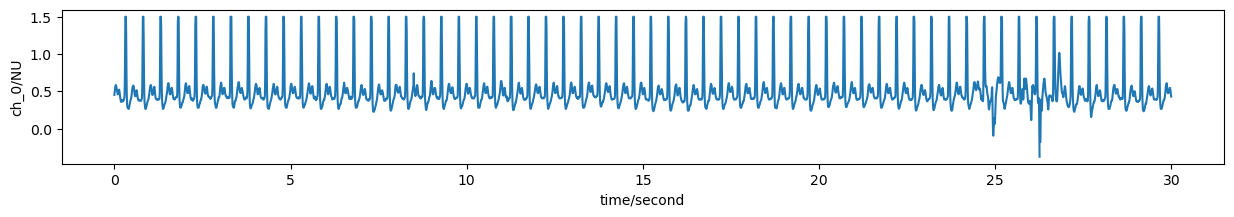

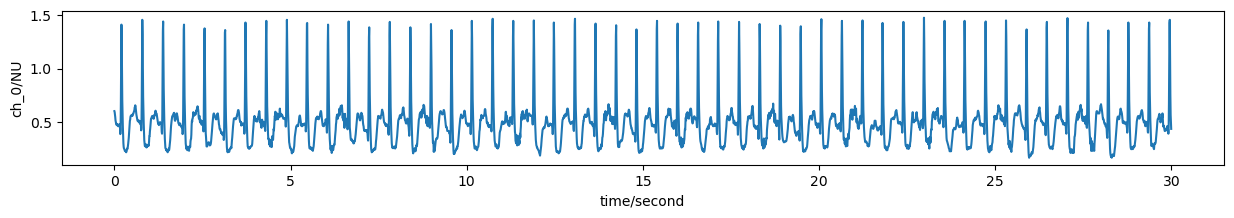

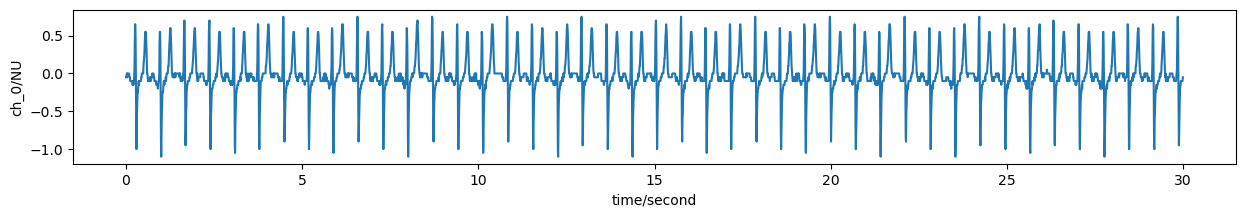

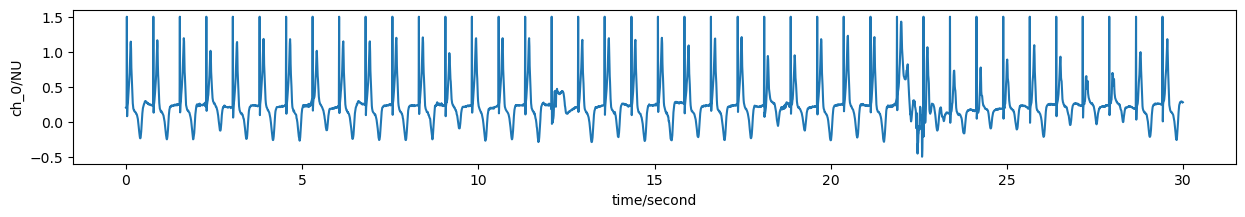

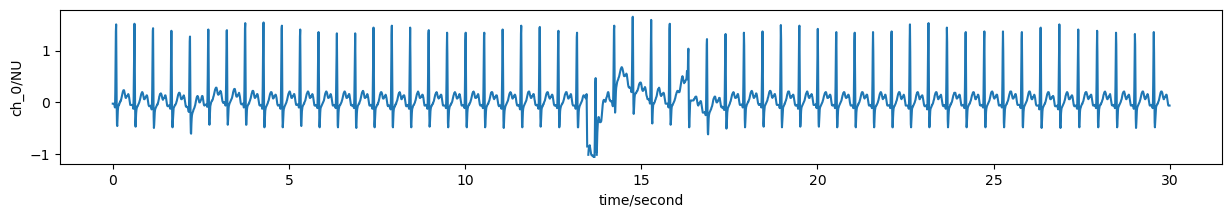

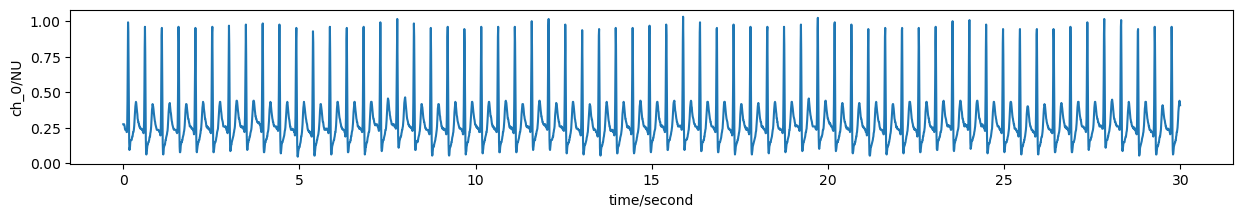

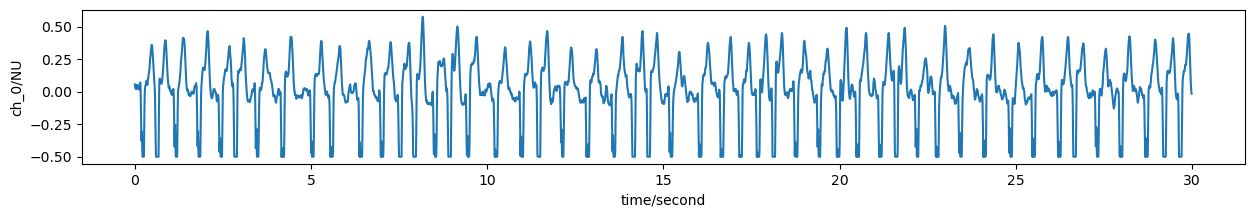

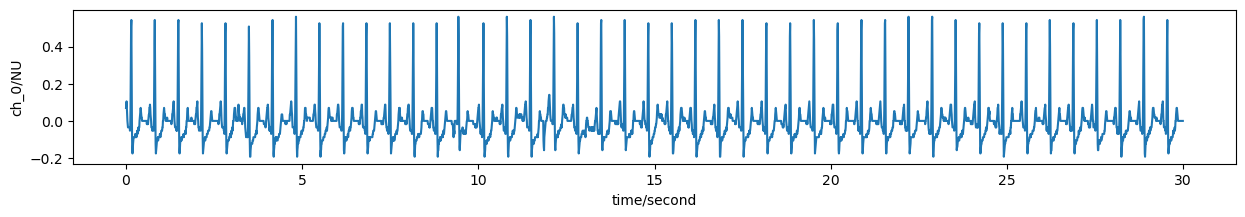

In [66]:
wfdb.plot_items(data[deaths_idx[6]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
wfdb.plot_items(data[deaths_idx[1]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
wfdb.plot_items(data[deaths_idx[2]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
wfdb.plot_items(data[deaths_idx[3]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
wfdb.plot_items(data[deaths_idx[4]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
wfdb.plot_items(data[deaths_idx[5]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
wfdb.plot_items(data[deaths_idx[7]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
wfdb.plot_items(data[deaths_idx[8]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
# wfdb.plot_items(data[deaths_idx[9]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))
# wfdb.plot_items(data[deaths_idx[0]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))

## Visualization of ECG data (30 secs before mechanical ventillation) of patients who SURVIVED

In [ ]:
# pick 10 random survivors samples
survivors_idx = table[table['label'] == 0].index

survivor_chosen = []
for idx in survivors_idx:
    if data[idx][0] is not None:
        survivor_chosen.append(idx)

In [11]:
survivors_idx = np.random.choice(survivor_chosen, 10)

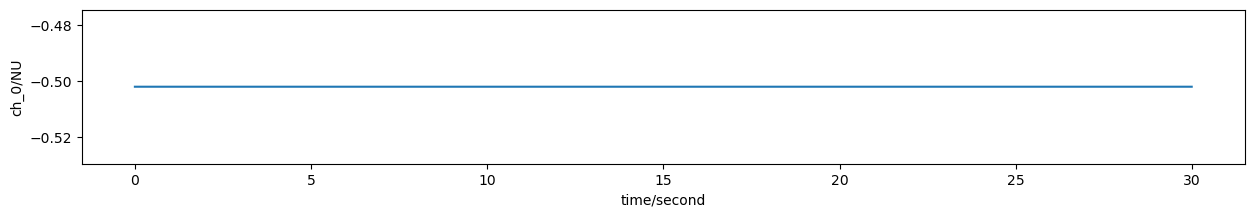

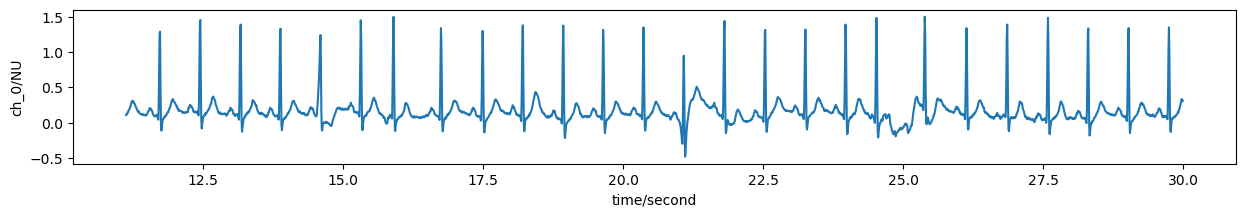

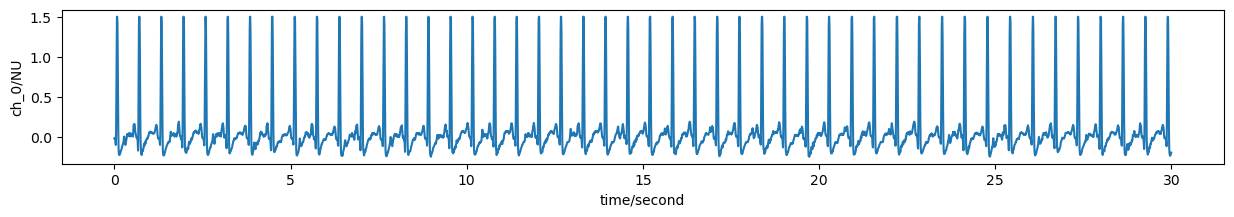

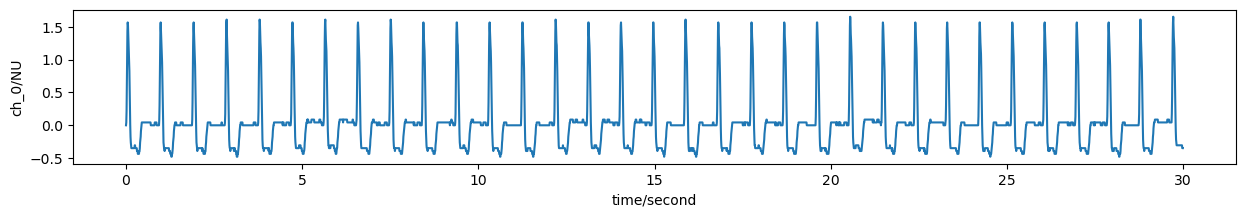

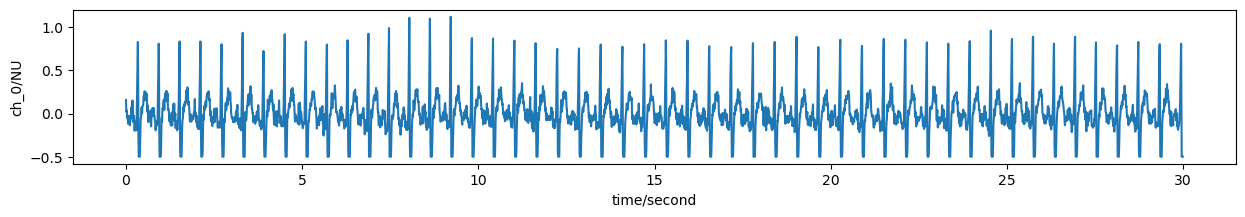

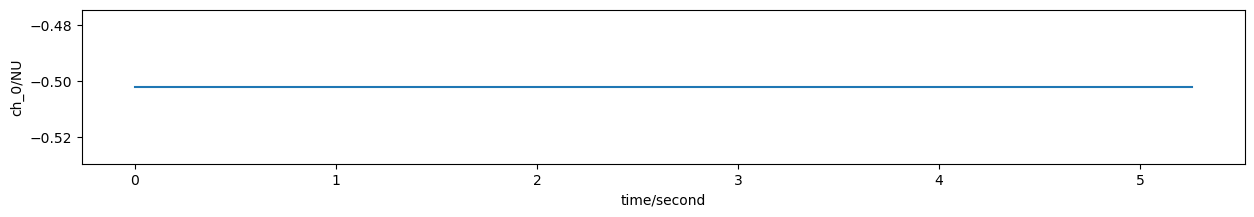

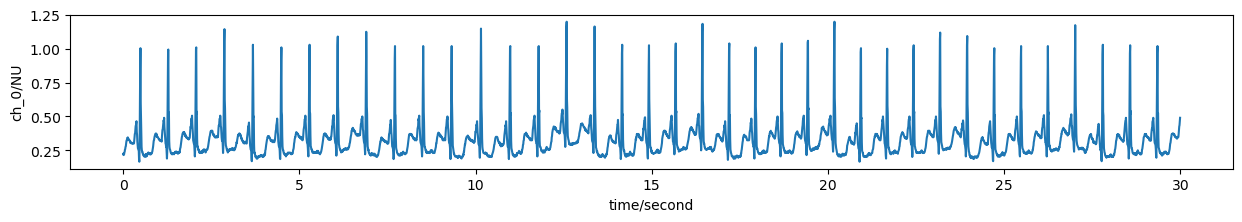

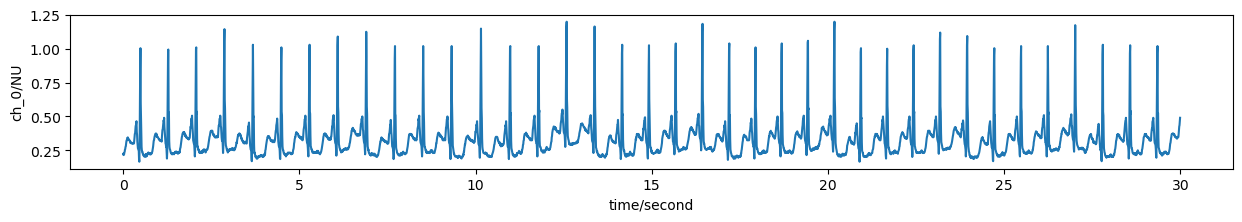

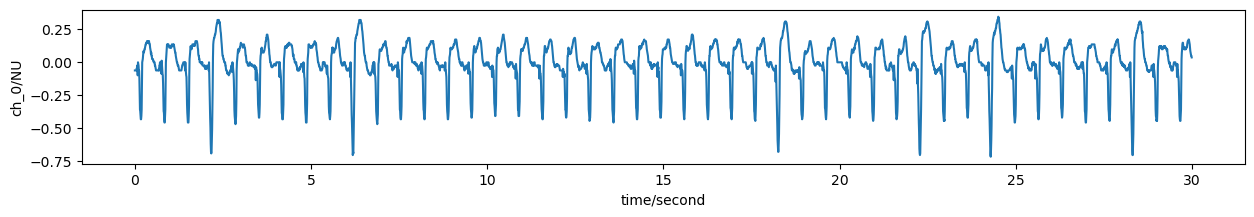

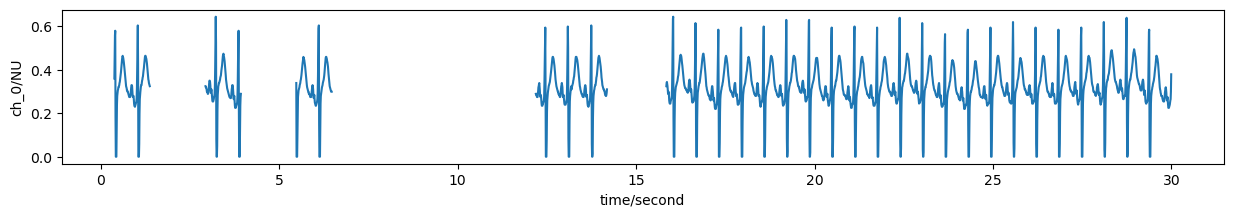

In [12]:
for i in range(10):
    wfdb.plot_items(data[survivors_idx[i]][0][0], fs= 125, time_units= 'seconds', figsize= (15, 2))